## Ripley-K for cluster detection
In this notebook, I am implementing Ripley-K algorithm to identify clusters in the super-resolution dataset.
I run a 2-step process for removing the noise and selecting clusters. 

In step one I remove the very sparse data by selecting ripley-k values at radius of 0.3 and setting the threshold to 3.

In the second step, I select ripley-k values at radius of 0.8 (almost at the max for each cluster), and set the threshold to 50.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.spatial.distance import squareform,pdist
from mpl_toolkits.mplot3d import Axes3D

#### Loading the data
The dataset consists of many columns. Each columns contains information regarding each spot image detected in the dataset. The 4th and the 5th column contain the X and Y location of the spots that I will use.

In [2]:
data = np.genfromtxt('play1.txt',skip_header=1,usecols=(3,4))
print ("Number of spots in the dataset = {}".format(data.shape[0]))

Number of spots in the dataset = 7186


### Performing Ripley-K

In [3]:
#Sorting the data. Useful for visualization later
data2 = data[np.argsort(data[:,0])]

#Maximum radius for caluclating Ripley-K
r = 25

N, k = data2.shape

#Calculating the distance matrix
dist = squareform(pdist(data2))

#Calculating the Ripley-K and increasing radii
rip_x = np.zeros((25,data2.shape[0]))
data3 = np.sort(dist,axis=0)                
for i in np.arange(0.1,2.6,0.1):
    
    rip_x[int((i-0.1)*10),:]=np.sum(data3[1:,:]<i,axis=0)                

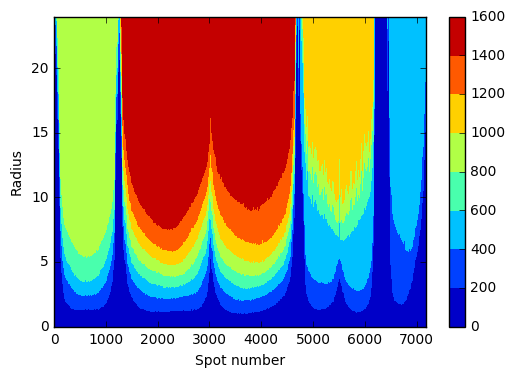

In [41]:
#Plotting the rip_x matrix.
#The x-axis is the spot number. The y-axis is the radius at which ripley-k was calulated.
#The intensity represents the number of spots close within radius r for a given spot.
#Since the spots were initially ordered, the spots belonging to a cluster form patches.
plt.contourf(rip_x)
plt.colorbar()
plt.xlabel("Spot number")
plt.ylabel("Radius")


#### First filtering

In [42]:
data4 = data2[rip_x[2,:]>3,:]
print ("Number of spots after first filter = {}".format(data4.shape[0]))

Number of spots after first filter = 5990


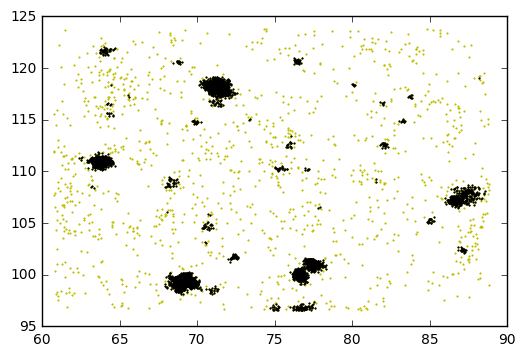

In [113]:
plt.plot(data2[:,0],data2[:,1],'.y',ms=2)
#plt.scatter(data4[:,0],data4[:,1])
plt.plot(data4[:,0],data4[:,1],'.k',ms=2)
plt.xlim([60,90])
plt.ylim([95,125])
plt.show()

#### The yellow does show the data that was noise and is removed. The black dots are the remaining spots in the data.

Second round of Ripley-K for the remaining spots

In [44]:
r = 25
N, k = data4.shape
dist1 = squareform(pdist(data4))
rip_x1 = np.zeros((25,data4.shape[0]))
data5 = np.sort(dist1,axis=0)                
for i in np.arange(0.1,2.6,0.1):
    
    rip_x1[int((i-0.1)*10),:]=np.sum(data5[1:,:]<i,axis=0)    

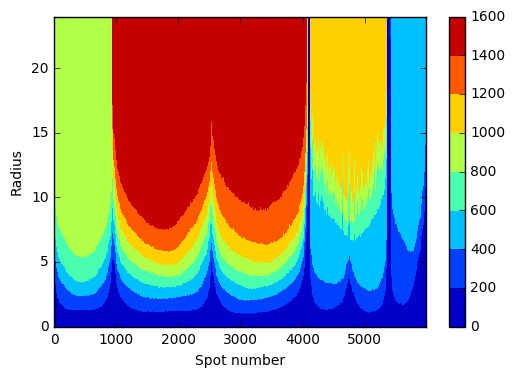

In [45]:
plt.contourf(rip_x1)
plt.colorbar()
plt.xlabel("Spot number")
plt.ylabel("Radius")

#### Second Filter

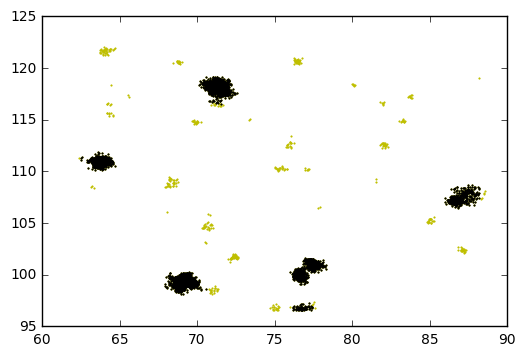

In [120]:
data6 = data4[rip_x1[8,:]>50,:]

plt.plot(data4[:,0],data4[:,1],'.y',ms=2)
#plt.scatter(data4[:,0],data4[:,1])
plt.plot(data6[:,0],data6[:,1],'.k',ms=2)
plt.xlim([60,90])
plt.ylim([95,125])

plt.show()

### Most of the noise is now removed with only clusters remaining.